In [125]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram, array_to_latex
from qiskit.result import marginal_distribution
from qiskit.circuit.library import UGate
from numpy import pi, random, sqrt
from qiskit.quantum_info import Statevector, Operator


In [126]:

random_gate = UGate(
    theta = random.random() * 2 * pi,
    phi = random.random() * 2 * pi,
    lam = random.random() * 2 * pi,
    )
random_gate_dg = random_gate.inverse()   

In [127]:
state = QuantumRegister(1,  name="|ψ>")
redundant = QuantumRegister(1, name="|0>")
ancilla = QuantumRegister(1, name="A")
syndrome = ClassicalRegister(1, name="S")


In [128]:
circuit = QuantumCircuit(state, redundant, ancilla, syndrome)
circuit.append(random_gate, state)
circuit.cx(state, redundant)

In [129]:
p_I = 0.5
def error_gate(qubit):
    rand_num = random.random()
    if rand_num >= p_I:
        circuit.x(qubit)


In [130]:
error_gate(state)
error_gate(redundant)

In [131]:
circuit.barrier()
circuit.h(ancilla)
circuit.cz(ancilla, state)
circuit.cz(ancilla, redundant)
circuit.h(ancilla)
circuit.measure(ancilla, syndrome)

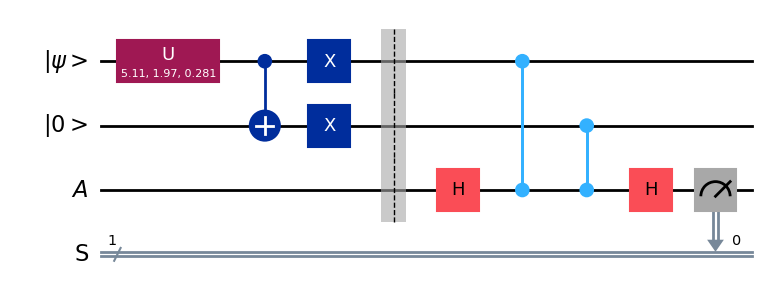

In [132]:
display(circuit.draw(output='mpl'))

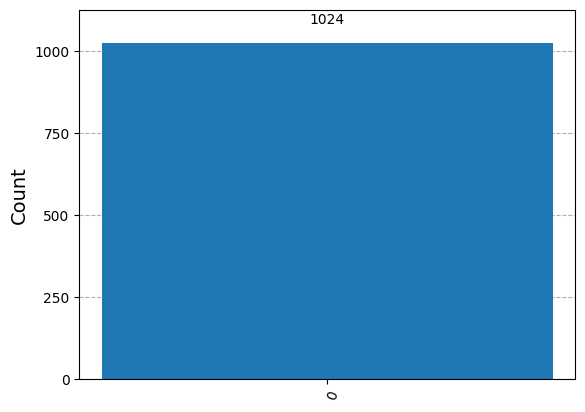

In [133]:
result = AerSimulator().run(circuit).result()
statistics = result.get_counts()
display(plot_histogram(statistics))